Sprint 11

Nivel 1

Conecta Python con MySQL Workbench y carga los datos de tu base de datos de Sprint 4 para utilizarlos en todos los ejercicios.

1. Conecta Python con MySQL Workbench y carga los datos de tu base de datos de Sprint 4 para utilizarlos en todos los ejercicios.

## Installs
'''bash
pip install mysql-connector-python
%pip install seaborn
'''


In [64]:
## Imports
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [65]:
# function to create a MySQL connection to Python

def create_connection(host, database, user, password):
    """  
    creates and returns a MySQL connection object.
    """
   
    try:
        connection = mysql.connector.connect(host=host, database=database, user=user, password=password)

        if connection.is_connected():
            db_Info = connection.server_info
            print(f'Connected to MySQL Server version {db_Info}')
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print(f'You are connected to database: {record[0]}')
            cursor.close()
            
            return connection

    except Error as e:
        print("Error while connecting to MySQL", e)
        return None
        

In [66]:
# funciton to load a single table
def load_table(connection, table_name):
    """
    Loads a single table from MySQL into a pandas DataFrame.
    """
    try:
        query = f'SELECT * FROM {table_name}'
        df = pd.read_sql(query, con=connection)
        print(f'Table {table_name} loaded ({len(df)} rows)')
        return df
    except Exception as e:
        print(f'Error loading table {table_name}: {e}')
        return None

# funciton to store multiple tables in a dictionary of DataFrames
def load_multi_tables(connection, tables):
    """  
    loads multiple tables from MySQL into a dictionary of DataFrames.
    """
   
    # dictionary to stores the DataFrames
    dataframes = {}

    # load each table into a DataFrame
    for table in tables:
        df = load_table(connection, table)
        if df is not None:
            dataframes[table] = df # store in a dictionary whith table name as key
    return dataframes



In [67]:
# function call for creating the connection
conn = create_connection('localhost', 'marketplace', 'root', 'root1234')

# object to store the table names and function call to upload the tables
tables = ['card_status', 'company', 'credit_card', 'products', 'transaction', 'transaction_products', 'users']
dataframes = load_multi_tables(conn, tables)

# connection close
if conn:
    conn.close()
    print("MySQL connection is closed") 

Connected to MySQL Server version 8.0.42
You are connected to database: marketplace


C:\Users\anacl\AppData\Local\Temp\ipykernel_23488\697746317.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


Table card_status loaded (5000 rows)
Table company loaded (100 rows)
Table credit_card loaded (5000 rows)
Table products loaded (100 rows)
Table transaction loaded (100000 rows)
Table transaction_products loaded (253391 rows)
Table users loaded (5000 rows)
MySQL connection is closed


In [68]:
# access the 'transaction' DataFrame for checking
dataframes['company'].head()

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r


In [69]:
# object for each dicctionary for use it as dataframes instead

df_company = dataframes['company']
df_card_status = dataframes['card_status']
df_credit_card = dataframes['credit_card']
df_products = dataframes['products']
df_transaction = dataframes['transaction']
df_transaction_products = dataframes['transaction_products']
df_users = dataframes['users']


In [70]:
# checking if the object type is a DataFrame
type(df_company)

pandas.core.frame.DataFrame

In [71]:
# checking the DataFrame columns type
df_company.dtypes

company_id      object
company_name    object
phone           object
email           object
country         object
website         object
dtype: object

2. Para cada elemento, crea una vista adecuada según las variables especificadas. Interpreta los resultados según sus datos.

Recuerda: cuando selecciones las columnas, piensa siempre en el método que vas a utilizar e incluye las necesarias para la función de visualización que quieras utilizar .

Una variable numérica.
Dos variables numéricas.
Una variable categórica.
Una variable categórica y una numérica.
Dos variables categóricas.
Tres variables combinadas.
Crea un Pairplot.

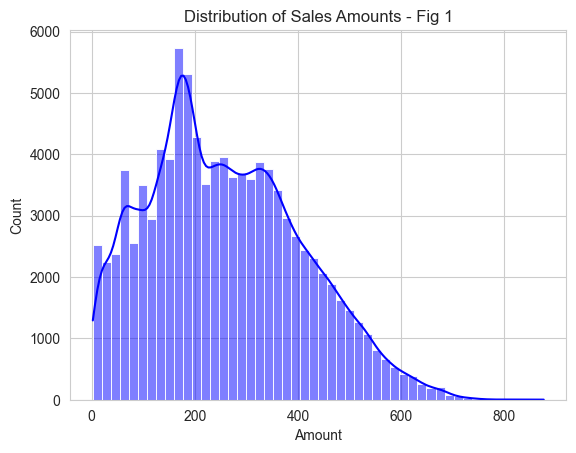

In [72]:
# 1 numeric variable - sales amount

sns.histplot(df_transaction['amount'], bins=50, kde=True, color='blue')

plt.xlabel('Amount')
plt.title('Distribution of Sales Amounts - Fig 1')
plt.savefig('Sales Amount.png')
plt.show()


##### The graph from figure 1 shows that the majority of transactions are close to 200$.

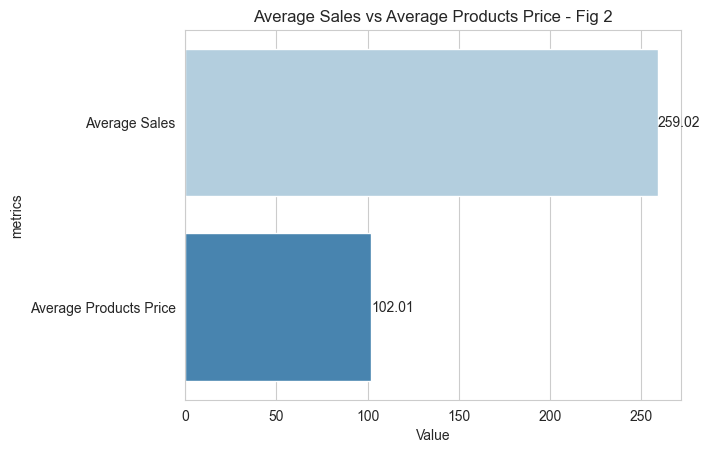

In [73]:
# 2 numeric variables - average sales and average products price

average_sales = df_transaction['amount'].mean()
average_products_price = df_products['price'].mean()

summary = pd.DataFrame({
    'variables': [average_sales, average_products_price],
    'metrics': ['Average Sales', 'Average Products Price']})

summary.to_csv('summary_metrix.csv', index=False)

ax = sns.barplot(data=summary, x='variables', y='metrics', hue= 'metrics', palette='Blues', legend= False)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')


plt.xlabel('Value')
plt.title('Average Sales vs Average Products Price - Fig 2')
plt.savefig('Average Sales and Price.png')
plt.show()


##### The graph from Fig 2 shows that the average sales are 250$ and the average products price is around 102$

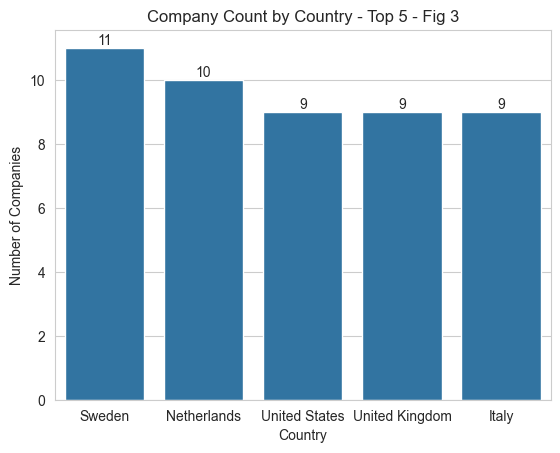

In [74]:
# 1 categorical variable - total company by country (top 5)

country_counts = df_company['country'].value_counts().nlargest(5)
top_countries = country_counts.index

df_top = df_company[df_company['country'].isin(top_countries)]

sns.set_style('whitegrid')
bx = sns.countplot(data=df_top, x='country', order=top_countries)

for container in bx.containers:
    bx.bar_label(container, fmt='%d')

plt.title('Company Count by Country - Top 5 - Fig 3')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.savefig('Company Country.png')
plt.show()


##### The Fig 3 visualization shows that in this Marketplace, from the 5 countries with the most company quantities Sweeden is the one with the most amount:11. 
##### Following by Netherlands with 10, United States and United Kingdon has 9 and Italy 8.  
##### We have 48 companies concentrated in 5 countries

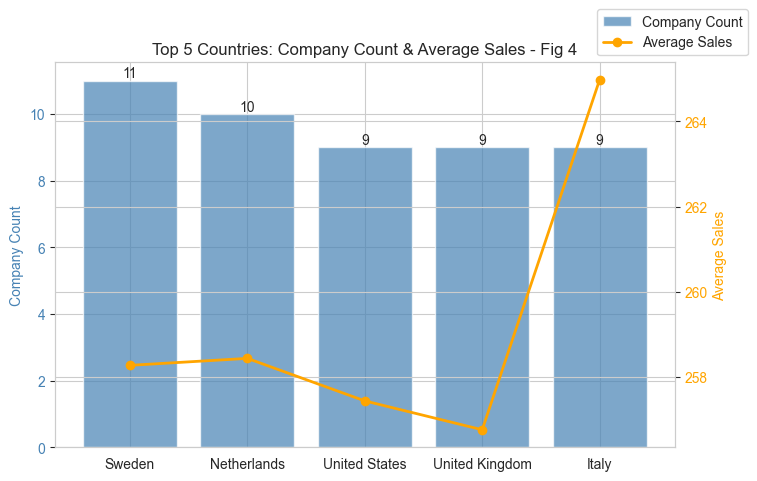

In [75]:
# 1 categorical and 1 numerical - total company by country and average sales

# here the company country is the categorical varible

country_counts = df_company['country'].value_counts().nlargest(5)
top_countries = country_counts.index

df_top = df_company[df_company['country'].isin(top_countries)]

transaction_company_country = pd.merge(df_top, df_transaction, how='inner', left_on='company_id', right_on='business_id')

count_company = df_top['country'].value_counts().loc[top_countries]
average_sales_top = transaction_company_country.groupby('country').agg ( average = ('amount', 'mean'))

df_graph = pd.DataFrame({'Country': list(top_countries), 'Company Count': list(count_company.values), 'Average Sales': list(average_sales_top.values)})

df_graph.to_csv('df_graph_figure_5', index=False)

sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(8,5))

# primary axis Company Count
bar1 = ax1.bar(df_graph['Country'], df_graph['Company Count'], color='steelblue', alpha=0.7, label='Company Count')
ax1.set_ylabel('Company Count', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.bar_label(bar1, fmt='%d')

# secondary axis Average Sales
ax2 = ax1.twinx()
bar2 = ax2.plot(df_graph['Country'], df_graph['Average Sales'], color='orange', marker='o', linewidth=2, label='Average Sales')
ax2.set_ylabel('Average Sales', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


plt.title('Top 5 Countries: Company Count & Average Sales - Fig 4')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), frameon=True)
plt.savefig('Top 5 Countries Company Sales.png')
plt.show()


##### The Fig 4 visualization above shows that for the top 5 contries Italy has the higher average sales amount (>264$).
##### Sweeden and Netherlands have the average sales a bit over 258$ and that the United States and United Kingdon are below this amount.

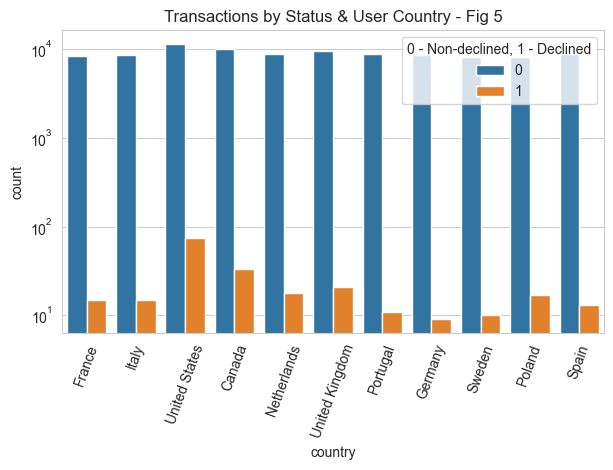

In [76]:
# 2 categorical - transactions by status and user country

declined_country = pd.merge(df_transaction, df_users, how='inner', left_on='user_id', right_on='id') 

declined_country[['declined', 'country']]

declined_country.to_csv('Declined_by_Country.csv')

sns.countplot(data=declined_country, x='country', hue='declined')
plt.title('Transactions by Status & User Country - Fig 5')
plt.xticks(rotation=70)
plt.legend(title='0 - Non-declined, 1 - Declined')
# plt.legend(loc='upper right', bbox_to_anchor=(1,1), frameon='True', title='0 - Non-declined, 1 - Declined')
plt.tight_layout()
plt.yscale('log')
plt.savefig('Transaction_status_userCountry.png')
plt.show()


##### The Fig 5 visualization shows that United States and Canada have the most declined transaction and Germany the lowest.

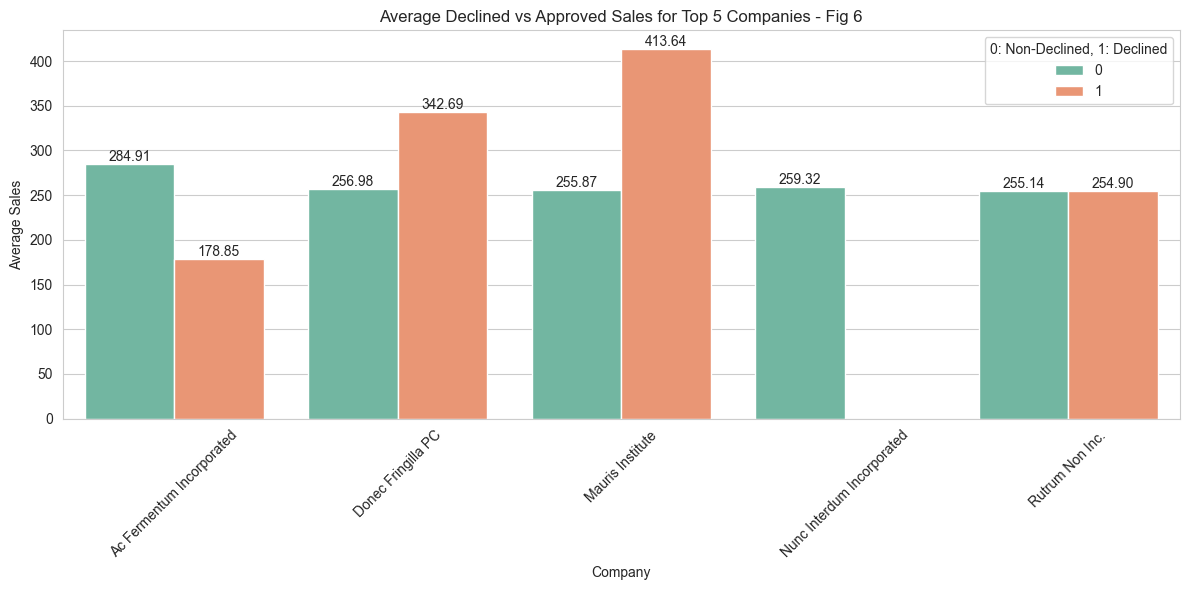

In [77]:
# 3 combined variables - average sales by transaction status for the top 5 companies

top_companies = df_transaction['business_id'].value_counts().nlargest(5).index
df_top_transactions = df_transaction[df_transaction['business_id'].isin(top_companies)]

df_transaction_company_name = pd.merge(df_top_transactions, df_company, left_on='business_id', right_on='company_id', how='inner')

df_grapg_3_var = df_transaction_company_name[['id', 'company_name', 'amount','declined','timestamp']]

df_grouped_declined = df_grapg_3_var.groupby(['company_name', 'declined']).agg(avg_sales=('amount', 'mean')).reset_index()

df_grouped_declined.to_csv('Declined_Transactions_avgSales.csv')

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_grouped_declined, x='company_name', y='avg_sales', hue='declined', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Average Declined vs Approved Sales for Top 5 Companies - Fig 6')
plt.xlabel('Company')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='0: Non-Declined, 1: Declined')
plt.tight_layout()
plt.savefig('Average_declined_approved.png')
plt.show()

##### The Figure 6 visuals shows that for the 5 companies with the highest transaction volumes, the average amount of declined transactios are equal or higher related to the approved ones.  Only the company Nunv Interdum Incorporated has all the trasactions approved.  The AC Fermentum Inc. is the only one with lowest declined amount if compared with the other 3.

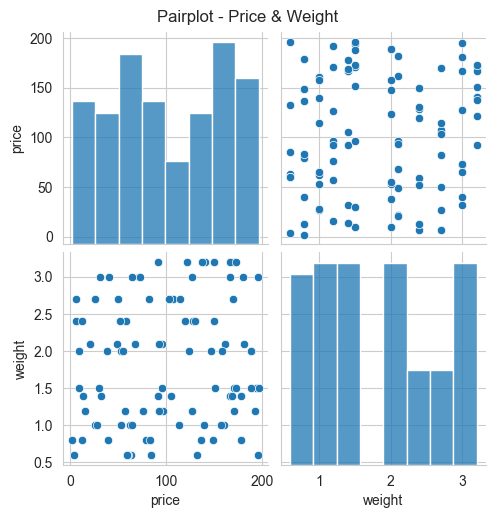

In [78]:
#pairplot

df_price_weight = df_products[['price', 'weight']]

df_price_weight.to_csv('Price_Weight.csv')

sns.pairplot(df_price_weight)
plt.suptitle('Pairplot - Price & Weight', y=1.02)
plt.savefig('Pairplot.png')
plt.show()

Nivel 2
1. Representa la correlación de algunas variables e interpreta los resultados según tus datos.


2. Implementa un Jointplot para explorar la relación entre dos variables e interpreta los resultados según tus datos.

In [79]:
# data preparation to have the products price and quantity in the same table

merged_tp_prod = pd.merge(df_transaction_products, df_products, how='left', left_on='product_id', right_on='id')

merged_tp_prod = merged_tp_prod.drop(columns='id')

merged_transaction_tp_prod = pd.merge(merged_tp_prod, df_transaction, how='left', left_on='transaction_id', right_on='id')

products_transactions = merged_transaction_tp_prod.groupby('transaction_id').size().reset_index(name='prod_quantity')

merged_transaction_tp_prod = merged_transaction_tp_prod.merge(products_transactions, how='left', on='transaction_id')

# merged_transaction_tp_prod.head() - merging check


In [80]:
# function to create a heatmap with the correlation between 2 variables

def correlation_visual (dataframe, var1, var2)-> None: 
    ''' 
        create a heatmap with the correlation between two variables and print the result
        value: None
    '''

    correlation = (dataframe[var1].corr(dataframe[var2])).round(2)

    sns.heatmap(dataframe[[var1, var2]].corr(), annot=True, cmap='coolwarm')

    plt.title(f'Correlation {var1} vs {var2}')
    plt.savefig(f'Corr_{var1}_{var2}.png')
    plt.show()
    print(f'The correlation between {var1} and {var2} is: {correlation}')
    
    if correlation >= 0.7:
            strength = "strong"
    elif correlation >= 0.3:
            strength = "moderate"
    elif correlation > 0:
            strength = "weak"
    elif correlation <= -0.7:
            strength = "strong negative"
    elif correlation <= -0.3:
            strength = "moderate negative"
    elif correlation < 0:
            strength = "weak negative"
    else:
        strength = "no"

    if correlation > 0:
            direction = "positive"
    elif correlation < 0:
            direction = "negative"
    else:
            direction = "none"
        
    print(f"This is a {strength} {direction} correlation.")
    return None




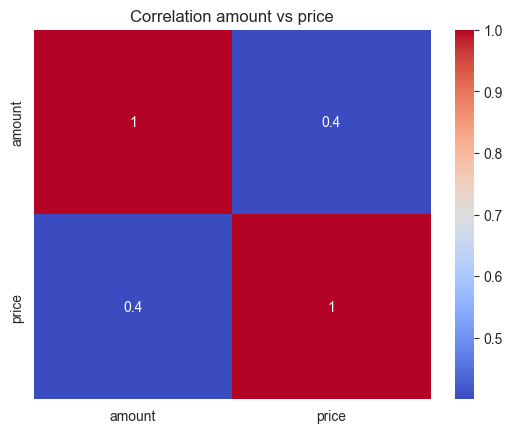

The correlation between amount and price is: 0.4
This is a moderate positive correlation.


In [81]:
# function call
correlation_visual(merged_transaction_tp_prod, 'amount', 'price')

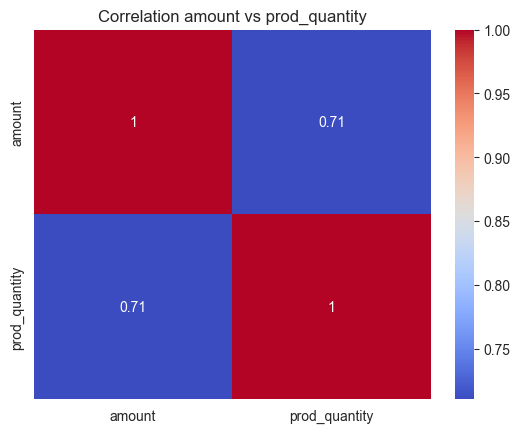

The correlation between amount and prod_quantity is: 0.71
This is a strong positive correlation.


In [82]:
correlation_visual(merged_transaction_tp_prod, 'amount', 'prod_quantity')

#### The visualization shows that products quantity strong correlated to amount while the price is onle moderated correlated. That indicates that the quantity has more impact on the amount of the transactions than the price itself.

In [83]:
# function to create a jointplot
def jointplot(dataframe,var1, var2) -> None:
    ''' 
        create a jointplot based on the parameters
        value: None
    '''
    
    sns.jointplot(x=var1, y=var2, data=dataframe, kind='scatter', height=7)
    plt.suptitle(f'Jointplot {var1} and {var2}', y=1.02)
    plt.savefig(f'Jointplot_{var1}_{var2}.png')
    plt.show()

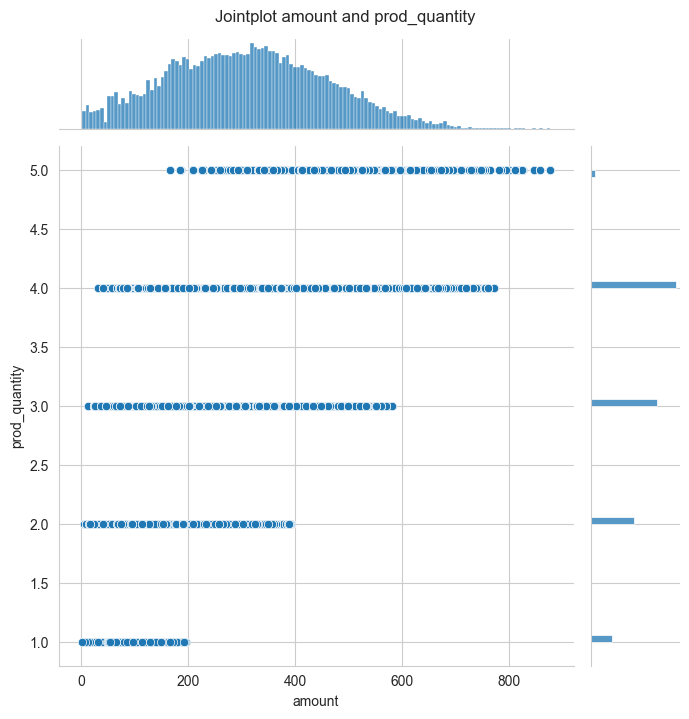

In [84]:
# function call
jointplot(merged_transaction_tp_prod, 'amount', 'prod_quantity')

#### The visualization shows that products quantity and transaction amount are correlated: more products, higher amount 

Nivel 3
1. Transfiere todas las visualizaciones del Nivel 1 a Power BI utilizando scripts de Python.

Recuerda: cuando cargues tus dataframes en Power BI, asegúrate de incluir una columna identificadora o una combinación de columnas 
que garantice la unicidad de cada registro. 
Por defecto, Power BI elimina duplicados y podrías perder información.

https://github.com/Ana-Dionisio/Data_Analytics/blob/main/Sprint_11.pbix